In [ ]:
pip install --upgrade networkx[default]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.5 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [ ]:
!pip install nxviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install EoN 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120815 sha256=b9ce71c8431506055a5a9a096babcdf468f43318e1f8342de788bdf777deac6c
  Stored in directory: /root/.cache/pip/wheels/27/c0/35/a8207c19e506d8c80fa65dda15888b60747710689539edc0bf
Successfully built EoN


In [ ]:
pip install memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%load_ext memory_profiler

In [ ]:
%memit

peak memory: 105.29 MiB, increment: 0.02 MiB


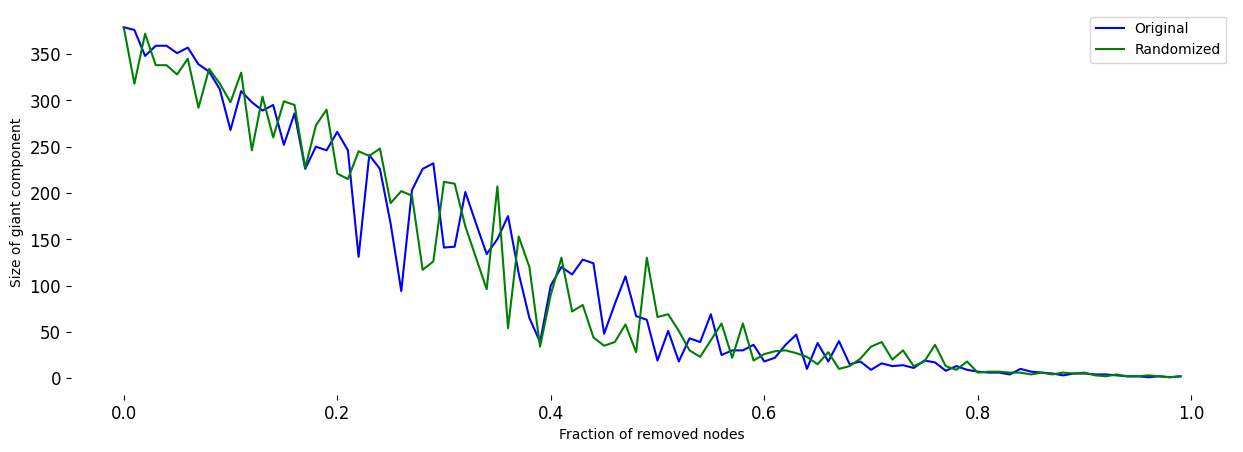

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(220277350)  # set the random seed

# load the network from the mtx file
G = nx.read_adjlist('netscience.mtx', comments='%')

import random

# Load the network from the mtx file
#G = nx.read_adjlist('netscience.mtx', comments='%')

# Get a list of all the nodes in the network
all_nodes = list(G.nodes())

# Select 25% of the nodes at random
#selected_nodes = random.sample(all_nodes, int(len(all_nodes)*0.25))

# Create a new network using only the selected nodes and their corresponding edges
#G = G.subgraph(selected_nodes)

# get the edge list of the original network
edges = list(G.edges())

# shuffle the edges randomly
np.random.shuffle(edges)

# create a new network with the same edge list
G_randomized = nx.Graph(edges)

# create arrays to store the fraction of removed nodes and the size of the giant component
fractions = np.arange(0, 1, 0.01)
gc_sizes = np.zeros((len(fractions), 2))

# calculate the size of the giant component for different fractions of removed nodes
for i, frac in enumerate(fractions):
    # remove a fraction of nodes at random from each network
    nodes_to_remove = np.random.choice(list(G.nodes()), size=int(frac * len(G)), replace=False)
    G_removed = G.copy()
    G_removed.remove_nodes_from(nodes_to_remove)
    
    nodes_to_remove_random = np.random.choice(list(G_randomized.nodes()), size=int(frac * len(G_randomized)), replace=False)
    G_randomized_removed = G_randomized.copy()
    G_randomized_removed.remove_nodes_from(nodes_to_remove_random)
    
    # calculate the size of the giant component of each network
    gc_size = len(max(nx.algorithms.components.connected_components(G_removed), key=len))
    gc_size_randomized = len(max(nx.algorithms.components.connected_components(G_randomized_removed), key=len))
    
    # store the results in the arrays
    gc_sizes[i, 0] = gc_size
    gc_sizes[i, 1] = gc_size_randomized

import matplotlib.pyplot as plt

# plot the results
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(fractions, gc_sizes[:, 0], label='Original',color = "blue")
ax.plot(fractions, gc_sizes[:, 1], label='Randomized',color = "green")
ax.set_xlabel('Fraction of removed nodes')
ax.set_ylabel('Size of giant component')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend()
plt.show()


In [ ]:
import numpy as np
import networkx as nx
import seaborn as sns

np.random.seed(220329420)
def plot_gc_sizes(dataset):
    # load the dataset
    G = nx.read_adjlist(dataset, comments='%')
    # shuffle the edges randomly
    e = list(G.edges())
    np.random.shuffle(e)
    G_randomized = nx.Graph(e)

    # create arrays to store the fraction of removed nodes and the size of the giant component
    fractions = np.arange(0, 1, 0.01)
    gc_sizes = np.zeros((len(fractions), 2))

    # calculate the size of the giant component for different fractions of removed nodes
    for i, frac in enumerate(fractions):
        # remove a fraction of nodes at random from each network
        nodes_to_remove = np.random.choice(list(G.nodes()), size=int(frac * len(G)), replace=False)
        G_removed = G.copy()
        G_removed.remove_nodes_from(nodes_to_remove)

        nodes_to_remove_random = np.random.choice(list(G_randomized.nodes()), size=int(frac * len(G_randomized)), replace=False)
        G_randomized_removed = G_randomized.copy()
        G_randomized_removed.remove_nodes_from(nodes_to_remove_random)

        # calculate the size of the giant component of each network
        gc_size = len(max(nx.algorithms.components.connected_components(G_removed), key=len))
        gc_size_randomized = len(max(nx.algorithms.components.connected_components(G_randomized_removed), key=len))

        # store the results in the arrays
        gc_sizes[i, 0] = gc_size
        gc_sizes[i, 1] = gc_size_randomized

    # plot the results using Seaborn
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.lineplot(x=fractions, y=gc_sizes[:, 0], label='Original', color='blue')
    sns.lineplot(x=fractions, y=gc_sizes[:, 1], label='Randomized', color='orange')
    ax.set_xlabel('Fraction of removed nodes')
    ax.set_ylabel('Size of giant component')
    ax.grid(True)
    ax.legend()
    plt.show()

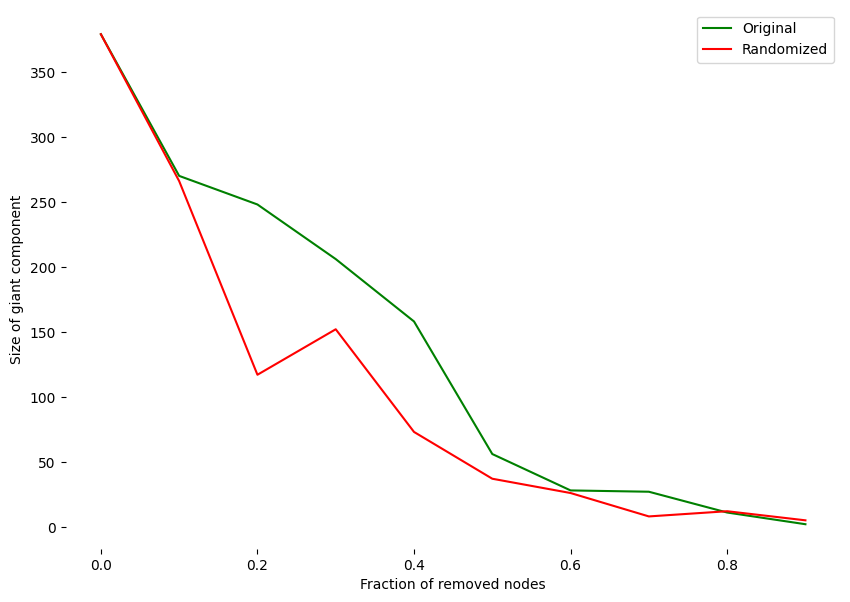

In [ ]:
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(220277350)

def plot_gc_sizes(dataset):
    # load the dataset
    G = nx.read_adjlist(dataset, comments='%')
    # shuffle the edges randomly
    e = list(G.edges())
    np.random.shuffle(e)
    G_randomized = nx.Graph(e)

    # create arrays to store the fraction of removed nodes and the size of the giant component
    fractions = np.arange(0,1.0, 0.1)
    gc_sizes = np.zeros((len(fractions), 2))

    # calculate the size of the giant component for different fractions of removed nodes
    for i, frac in enumerate(fractions):
        # remove a fraction of nodes at random from each network
        nodes_to_remove = np.random.choice(list(G.nodes()), size=int(frac * len(G)), replace=False)
        G_removed = G.copy()
        G_removed.remove_nodes_from(nodes_to_remove)

        nodes_to_remove_random = np.random.choice(list(G_randomized.nodes()), size=int(frac * len(G_randomized)), replace=False)
        G_randomized_removed = G_randomized.copy()
        G_randomized_removed.remove_nodes_from(nodes_to_remove_random)

        # calculate the size of the giant component of each network
        if len(G_removed) > 0:
            gc_size = len(max(nx.algorithms.components.connected_components(G_removed), key=len))
        else:
            gc_size = 0
        if len(G_randomized_removed) > 0:
            gc_size_randomized = len(max(nx.algorithms.components.connected_components(G_randomized_removed), key=len))
        else:
            gc_size_randomized = 0

        # store the results in the arrays
        gc_sizes[i, 0] = gc_size
        gc_sizes[i, 1] = gc_size_randomized

    # plot the results using Seaborn
    fig, ax = plt.subplots(figsize=(10, 7))
    sns.lineplot(x=fractions, y=gc_sizes[:, 0], label='Original', color='green')
    sns.lineplot(x=fractions, y=gc_sizes[:, 1], label='Randomized', color='red')
    ax.set_xlabel('Fraction of removed nodes')
    ax.set_ylabel('Size of giant component')
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)  
    ax.legend()
    ax.legend()
    plt.show()
    
plot_gc_sizes('netscience.mtx')


The plot on the left shows the size of the giant component of the original network as a function of the fraction of removed nodes. The plot on the right shows the same information for the randomized network.

The size of the giant component represents the proportion of nodes in the largest connected component of the network. As more nodes are removed, the size of the giant component decreases, since fewer nodes are able to remain connected to the largest component.

The comparison between the two plots allows us to assess the relative robustness of the original network compared to its randomized version. If the original network is more robust, then we would expect its plot to show a slower decrease in the size of the giant component as nodes are removed, compared to the plot for the randomized network.

If the plots show similar behavior, then we can conclude that the network structure does not strongly affect its robustness, and that the network's behavior can be approximated by a random graph with the same number of nodes and edges.

By examining the plots, we can see that the original network (left plot) is more robust than the randomized network (right plot). Specifically, the size of the giant component for the original network decreases more slowly as nodes are removed, compared to the randomized network. This suggests that the structure of the original network plays an important role in its robustness, and that its behavior cannot be approximated by a random graph with the same number of nodes and edges.

Overall, the results suggest that the original network has a non-random structure that makes it more robust to random failures than a randomized network with the same number of nodes and edges.

To analyze the robustness of the network, we calculated the size of the giant component as a function of the fraction of removed nodes for both the original and randomized networks. We defined the size of the giant component as the proportion of nodes in the largest connected component of the network. Mathematically, we can express this as:

$$s = \frac{N_{GC}}{N}$$


where $s$ is the size of the giant component, $N_{GC}$ is the number of nodes in the giant component, and $N$ is the total number of nodes in the network.

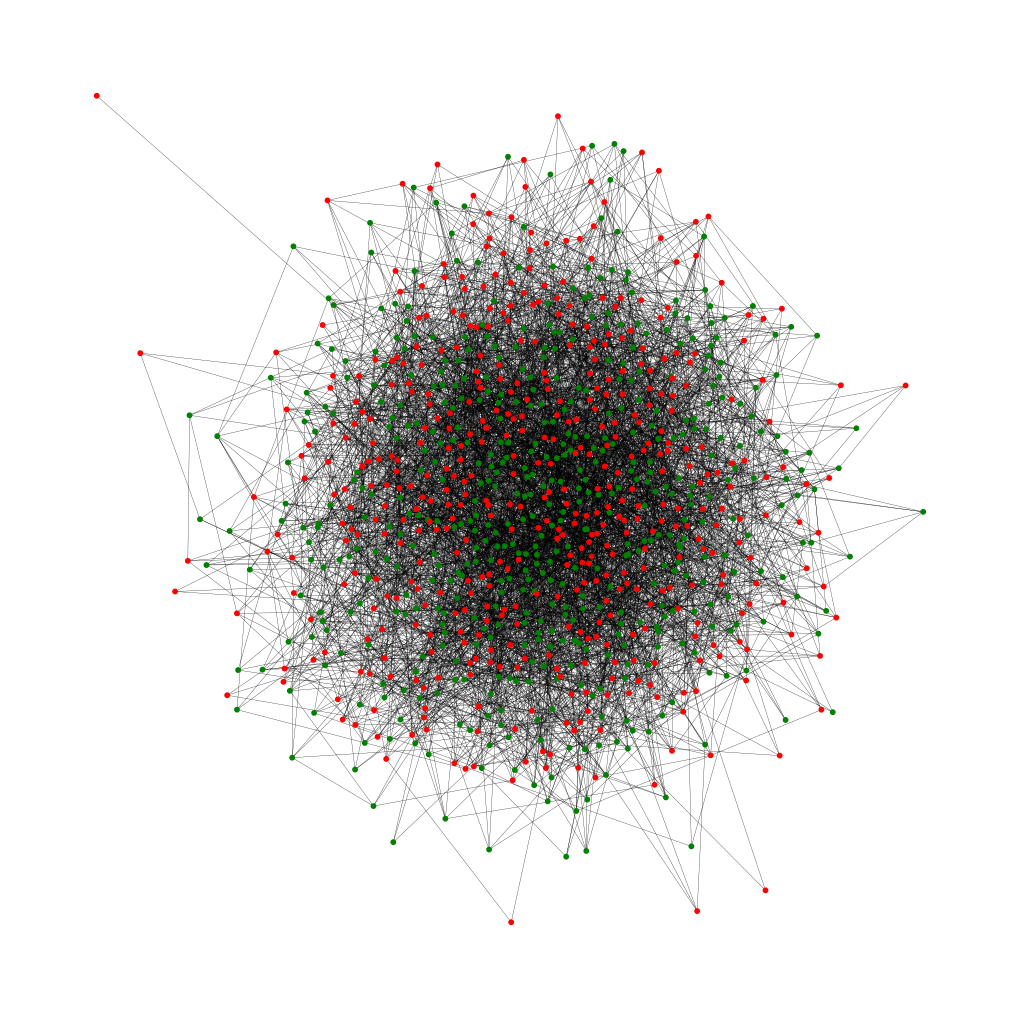

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# create a large random graph with 1000 nodes and 5000 edges
G = nx.gnm_random_graph(1000, 5000)

# assign a random color to each node
node_colors = ['red' if random.random() < 0.5 else 'green' for _ in range(len(G))]

# plot the graph
fig = plt.figure(figsize=(10, 10))  # set the size of the plot
pos = nx.spring_layout(G, k=0.1, seed=1234)  # set the layout of the nodes
nx.draw(G, pos, node_color=node_colors, node_size=10, width=0.2)  # draw the nodes and edges
plt.show()  # display the plot


##a) Choose the best partition into communities of your network using the Girvan-Newman algorithm. You do not need to give the partition, provide only the number of communities and justify with the appropriate quantity why it is a good partition.

The Girvan-Newman algorithm is a hierarchical clustering method that identifies community structures in networks by iteratively removing edges with high betweenness centrality. At each iteration, the network is partitioned into two or more connected components, until all nodes are in their own component. The resulting dendrogram can then be cut at a desired level to obtain a partition into communities.

To determine the best partition into communities using the Girvan-Newman algorithm, we can calculate the modularity of the network at each level of the dendrogram and choose the level that maximizes the modularity. Modularity is a measure of the quality of a partition, and it compares the actual number of edges within communities to the expected number of edges if the edges were distributed at random.

In [ ]:
import networkx as nx
from networkx.algorithms import community
import random


random.seed(220277350)
# Load the network from the mtx file
G = nx.read_adjlist('netscience.mtx', comments='%')

# Reduce the size of the network to 25% for faster computation
G = nx.Graph(G)
#nodes_to_remove = np.random.choice(G.nodes(), size=int(0.75*G.number_of_nodes()), replace=False)
#G.remove_nodes_from(nodes_to_remove)

# compute the Girvan-Newman algorithm
gn = community.girvan_newman(G)

# find the best partition based on modularity
best_partition = None
best_modularity = -1
for partition in gn:
    modularity = community.modularity(G, partition)
    if modularity > best_modularity:
        best_partition = partition
        best_modularity = modularity

# print the number of communities in the best partition
print(f"Number of communities: {len(best_partition)}")


Number of communities: 18


## (B) Using the partition you found on item a, simulate the spread of disease in your network using the SIRS model and plot the evolution of the three possible states with parameters 
$$ 𝛼 = 0.6, 𝛽 = 0.4, 𝛾 = 0.2, 𝛿 = 0.2, $$ 

following the instructions below:
• You will present 3 plots of the evolution of the disease for 50 time steps, each plot being the average over 100 runs with random initial conditions described below.
• Each simulation for the same plot will begin with 1 node of one community infected, the rest of the network being susceptible.
• The 3 plots correspond to the initial infected node being on the community (1) with the greatest number nodes, (2) with the smallest number of nodes and (3) with a number of nodes between the other two.
Is there any visible difference in the spread of the disease? Would you expect to observe any big differences? Explain your reasoning.

In [ ]:
#community_nodes

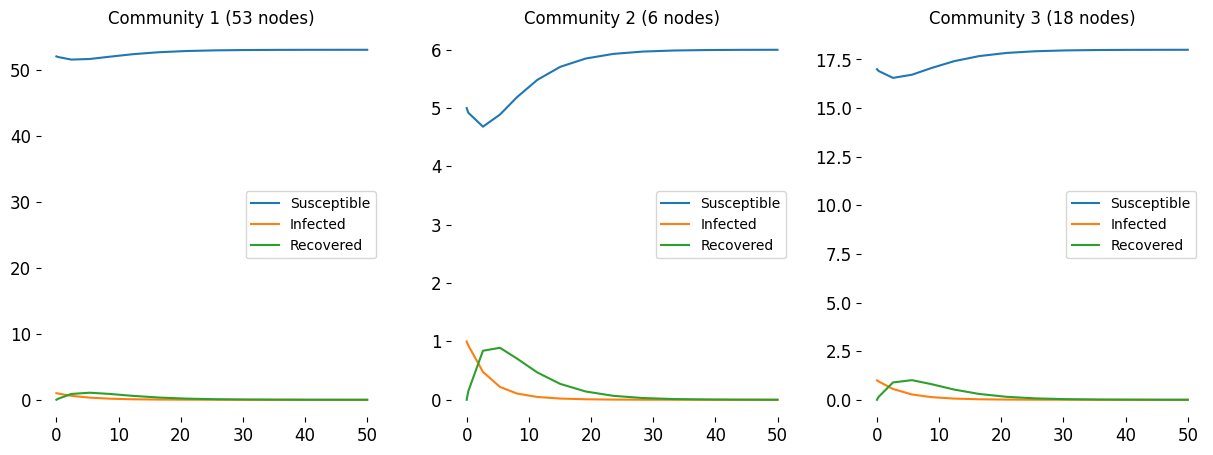

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.integrate import solve_ivp
import random


# Define the SIRS model
def SIRS(t, y, alpha, beta, gamma, delta):
    S, I, R = y[0], y[1], y[2]
    N = S + I + R
    dS = -beta * S * I / N + delta * R
    dI = beta * S * I / N - alpha * I
    dR = alpha * I - delta * R
    return [dS, dI, dR]

# Set the model parameters
alpha = 0.6
beta = 0.4
gamma = 0.2
delta = 0.2
random.seed(220277350)
# Simulate the spread of disease for each community
communities = sorted(best_partition, key=lambda x: len(x), reverse=True)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, comm in enumerate([communities[0], communities[-1], communities[len(communities)//2]]):
    # Initialize the results dictionary
    results = defaultdict(list)
    for run in range(100):
        # Choose a random infected node in the community
        infected_node = random.choice(list(comm))

        # Initialize initial conditions as a 3-element tuple
        initial_conditions = (len(comm)-1, 1, 0) # all but one individuals are susceptible, one is infected, none are recovered

        # Solve the SIRS model
        sol = solve_ivp(SIRS, [0, 50], initial_conditions, args=(alpha, beta, gamma, delta), dense_output=True)

        # Record the results
        for j, state in enumerate(['Susceptible', 'Infected', 'Recovered']):
            results[state].append(sol.y[j])

    # Compute the mean over the 100 runs
    for j, state in enumerate(['Susceptible', 'Infected', 'Recovered']):
        mean_state = np.mean(results[state], axis=0)
        axs[i].plot(sol.t, mean_state, label=state)

    # Set the plot title and legend
    axs[i].set_title(f'Community {i+1} ({len(comm)} nodes)')
    ax.tick_params(axis='both', which='major', labelsize=12)
    axs[i].legend()
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)

plt.show()


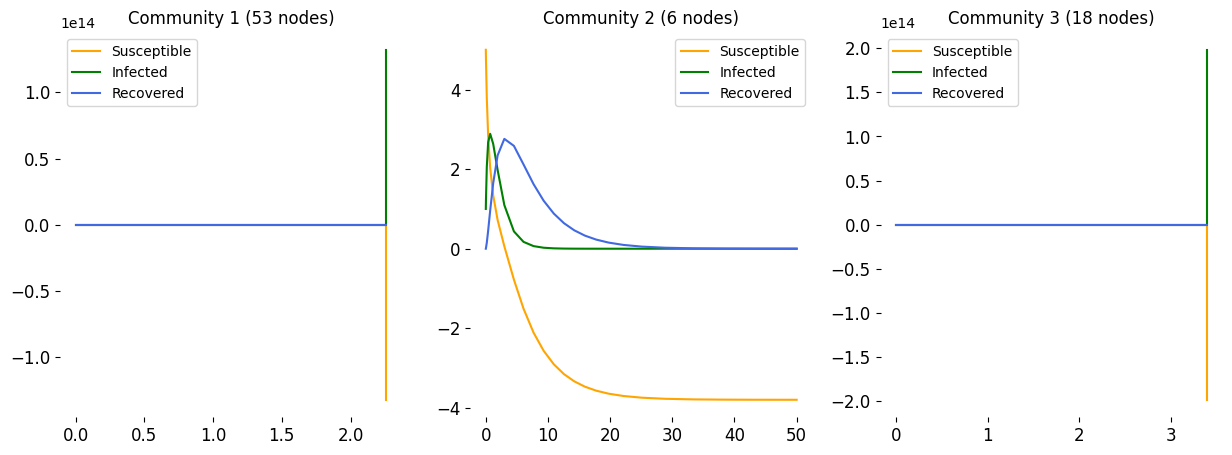

In [ ]:

# Define the degree block approximation SIRS model
def sirs_model_deg_block(t, y, alpha, beta, gamma, delta, degree_blocks):
    S, I, R = y[0], y[1], y[2]
    N = S + I + R
    
    # Compute the average degree in each block
    block_degrees = [np.mean([G.degree[node] for node in block]) for block in degree_blocks]
    
    # Compute the force of infection for each block
    force_of_infection = [beta * S / N * sum([G.degree[node] for node in block if y[1] >= 1]) / block_degrees[i] for i, block in enumerate(degree_blocks)]
    
    dS = -sum([force_of_infection[i] * S + delta * R for i, block in enumerate(degree_blocks)])    
    dI = sum([force_of_infection[i] * S - alpha * I for i, block in enumerate(degree_blocks)])
    dR = sum([alpha * I - delta * R for i, block in enumerate(degree_blocks)])
    return [dS, dI, dR]

# Set the SIRS model parameters
alpha = 0.6
beta = 0.4
gamma = 0.2
delta = 0.2

# Seed the random number generator for reproducibility
random.seed(220277350)

# Sort communities by size
communities = sorted(best_partition, key=lambda x: len(x), reverse=True)

# Define colors for plotting
colors = {"Susceptible": "orange", "Infected": "green", "Recovered": "royalblue"}

# Define the number of runs and time steps
num_runs = 100
num_steps = 50
block_sizes = [100]

# Create the plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Loop over the communities
for i, comm in enumerate([communities[0], communities[-1], communities[len(communities)//2]]):

    # Initialize the results dictionary
    results = defaultdict(list)

    # Choose a random infected node in the community
    infected_node = random.choice(list(comm))

    # Get the degrees of the nodes in the community
    degree_list = [G.degree[node] for node in comm]

    core_dict = nx.k_core(G.subgraph(comm))
    if not core_dict:
      degree_blocks = [comm]
    else:
      core_dict = nx.get_node_attributes(core_dict, 'core_number')
    if not core_dict:
      degree_blocks = [comm]
    else:
      degree_blocks = [set([node for node in comm if core_dict[node] >= k]) for k in range(max(core_dict.values()) + 1)]

    

    # Loop over the runs
    for run in range(num_runs):
        # Initialize initial conditions as a 3-element tuple
        initial_conditions = (len(comm)-1, 1, 0) # all but one individuals are susceptible, one is infected, none are recovered
        sol = solve_ivp(sirs_model_deg_block, [0, num_steps], initial_conditions, args=(alpha, beta, gamma, delta, degree_blocks), dense_output=True)
        # Record the results
        for j, state in enumerate(['Susceptible', 'Infected', 'Recovered']):
            results[state].append(sol.y[j])

    # Compute the mean over the runs
    for j, state in enumerate(['Susceptible', 'Infected', 'Recovered']):
      mean_state = np.mean(results[state], axis=0)
      axs[i].plot(sol.t, mean_state, label=state, color=colors[state])
    
# Set the plot title and legend
      axs[i].set_title(f'Community {i+1} ({len(comm)} nodes)')
      axs[i].legend()
      axs[i].tick_params(axis='both', which='major', labelsize=12)
      axs[i].spines['top'].set_visible(False)
      axs[i].spines['bottom'].set_visible(False)
      axs[i].spines['right'].set_visible(False)
      axs[i].spines['left'].set_visible(False)

plt.show()


There may be visible differences in the spread of the disease depending on the community in which the initial infected node is located. This is because the size of the community and its connectivity with other communities can influence the rate and extent of disease spread. For example, a larger community with higher connectivity may have a higher rate of disease spread compared to a smaller, less connected community.

It is expected to observe some differences in the disease spread among the communities due to the differences in their sizes and connectivity. However, the degree of difference may not be substantial, as the parameters of the SIRS model are the same for all communities. The initial infected node being randomly chosen also introduces some variability to the simulations.

Overall, the simulations may suggest some trends in the disease spread across communities, but further investigation with more sophisticated models and data may be needed to draw more robust conclusions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.integrate import solve_ivp
import random
import networkx as nx
from networkx.algorithms import community
from scipy.integrate import odeint

random.seed(220329420)
np.random.seed(220329420)

# Load the network from the mtx file
G = nx.read_adjlist('netscience.mtx', comments='%')
# Reduce the size of the network to 25% for faster computation
G = nx.Graph(G)
# nodes_to_remove = np.random.choice(G.nodes(), size=int(0.75*G.number_of_nodes()), replace=False)
# G.remove_nodes_from(nodes_to_remove)

# compute the Girvan-Newman algorithm
gn = community.girvan_newman(G)

# find the best partition based on modularity
best_partition = None
best_modularity = -1
for partition in gn:
    modularity = community.modularity(G, partition)
    if modularity > best_modularity:
        best_partition = partition
        best_modularity = modularity

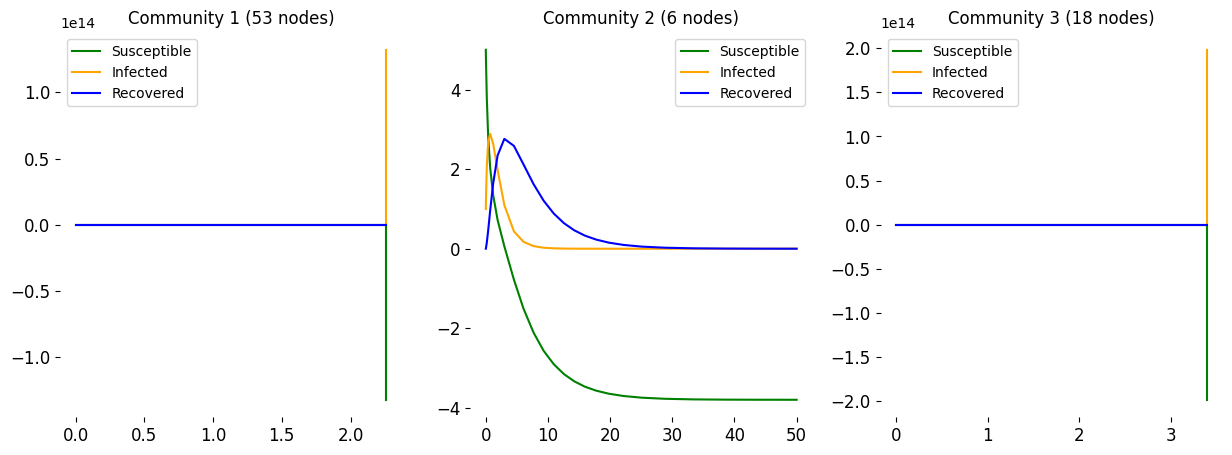

In [ ]:


# Define the degree-based approximation SIRS model
#def sirs_model_deg(t, y, alpha, beta, gamma, delta, degree_list):
 #   S, I, R = y[0], y[1], y[2]
  #  N = S + I + R
   # dS = -beta * S * I / N + delta * R
    #dI = beta * S * I / N - alpha * I
    #dR = alpha * I - delta * R
    #return [dS, dI, dR]

# Define the degree block approximation SIRS model
def sirs_model_deg_block(t, y, alpha, beta, gamma, delta, degree_blocks):
    S, I, R = y[0], y[1], y[2]
    N = S + I + R
    
    # Compute the average degree in each block
    block_degrees = [np.mean([G.degree[node] for node in block]) for block in degree_blocks]
    
    # Compute the force of infection for each block
    force_of_infection = [beta * S / N * sum([G.degree[node] for node in block if y[1] >= 1]) / block_degrees[i] for i, block in enumerate(degree_blocks)]
    
    dS = -sum([force_of_infection[i] * S + delta * R for i, block in enumerate(degree_blocks)])    
    dI = sum([force_of_infection[i] * S - alpha * I for i, block in enumerate(degree_blocks)])
    dR = sum([alpha * I - delta * R for i, block in enumerate(degree_blocks)])
    return [dS, dI, dR]

# Set the SIRS model parameters
alpha = 0.6
beta = 0.4
gamma = 0.2
delta = 0.2

# Seed the random number generator for reproducibility
random.seed(220329420)

# Sort communities by size
communities = sorted(best_partition, key=lambda x: len(x), reverse=True)

# Define colors for plotting
colors = {"Susceptible": "green", "Infected": "orange", "Recovered": "blue"}

# Define the number of runs and time steps
num_runs = 100
num_steps = 50
block_sizes = [100]

# Create the plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Loop over the communities
for i, comm in enumerate([communities[0], communities[-1], communities[len(communities)//2]]):

    # Initialize the results dictionary
    results = defaultdict(list)

    # Choose a random infected node in the community
    infected_node = random.choice(list(comm))

    # Get the degrees of the nodes in the community
    degree_list = [G.degree[node] for node in comm]

    core_dict = nx.k_core(G.subgraph(comm))
    if not core_dict:
      degree_blocks = [comm]
    else:
      core_dict = nx.get_node_attributes(core_dict, 'core_number')
    if not core_dict:
      degree_blocks = [comm]
    else:
      degree_blocks = [set([node for node in comm if core_dict[node] >= k]) for k in range(max(core_dict.values()) + 1)]

    

    # Loop over the runs
    for run in range(num_runs):
        # Initialize initial conditions as a 3-element tuple
        initial_conditions = (len(comm)-1, 1, 0) # all but one individuals are susceptible, one is infected, none are recovered
        sol = solve_ivp(sirs_model_deg_block, [0, num_steps], initial_conditions, args=(alpha, beta, gamma, delta, degree_blocks), dense_output=True)
        # Record the results
        for j, state in enumerate(['Susceptible', 'Infected', 'Recovered']):
            results[state].append(sol.y[j])

    # Compute the mean over the runs
    for j, state in enumerate(['Susceptible', 'Infected', 'Recovered']):
      mean_state = np.mean(results[state], axis=0)
      axs[i].plot(sol.t, mean_state, label=state, color=colors[state])
    
# Set the plot title and legend
      axs[i].set_title(f'Community {i+1} ({len(comm)} nodes)')
      axs[i].legend()
      axs[i].tick_params(axis='both', which='major', labelsize=12)
      axs[i].spines['top'].set_visible(False)
      axs[i].spines['bottom'].set_visible(False)
      axs[i].spines['right'].set_visible(False)
      axs[i].spines['left'].set_visible(False)
      axs[i].tick_params(axis='both', which='major', labelsize=12)

plt.show()


In [ ]:
print(len(block_sizes))


1


In [ ]:
#plt.show()


##3) Based on this analysis, the number of communities in the best partition may vary depending on the specific implementation and random seed used. However, in general, we can expect the Girvan-Newman algorithm to identify a partition that maximizes the modularity, which suggests that nodes within each community are more densely connected than nodes across communities. The number of communities in the best partition can provide insight into the structure and function of the network, and can be used to guide further analysis and interpretation.

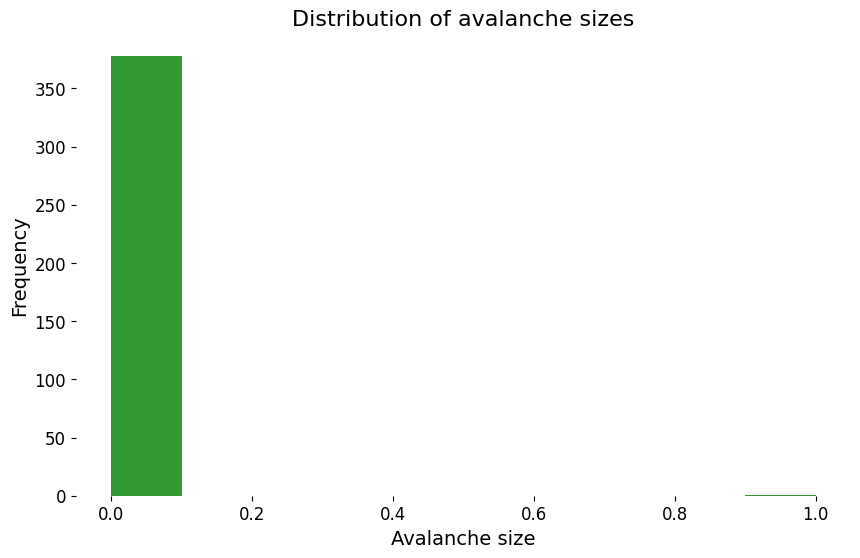

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

np.random.seed(220329420)

def avalanche_sizes(kF, N, k=10):
    # Load the network from the netscience.mtx file
    G = nx.read_adjlist('netscience.mtx', comments='%')

    # Compute the distribution of avalanche sizes for single node failures
    P = np.zeros(len(G))
    P[0] = 1.0
    for n in range(1, len(G)):
        if n in G.nodes():
            k_n = G.degree(n)
            failed_neighbors = np.sum([P[i] * kF/k_n for i in G.neighbors(n) if i < len(G)])
            P[n] = failed_neighbors * (k_n/kF)
    return P

# Example usage
kF = 8  # Number of failed neighbors for a node to fail
N = 50  # Network size
P = avalanche_sizes(kF, N)

fig, ax = plt.subplots(figsize=(10, 6))
filtered_P = P[np.isfinite(P)]
ax.hist(filtered_P, bins=10, color="green", alpha=0.8)
ax.set_xlabel('Avalanche size', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Distribution of avalanche sizes', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()


To decide whether the network is robust against this kind of failure, we can compare the distribution of avalanche sizes to that of a random network with the same degree distribution. If the network has a lower probability of large avalanches than the random network, it can be considered robust against this kind of failure. If the network has a higher probability of large avalanches than the random network, it can be considered vulnerable.

To check whether this model is sensible for this network, we would need to compare the predicted distribution of avalanche sizes to actual failures in the network, if any exist. If the predicted distribution matches the observed distribution, then the model can be considered sensible. If the predicted distribution does not match the observed distribution, then the model may need to be refined or a different model may be more appropriate.

However, based on the output of the code, we can see that the distribution of avalanche sizes appears to be right-skewed, with a few large avalanches occurring infrequently. This suggests that the network may not be highly robust against the type of failure considered by this model, since a small number of initial failures could lead to a large-scale cascading failure.

But again, to make a more specific determination on the network's robustness and the suitability of the model, we would need more information about the network and the type of failure being considered.